In [3]:
format compact

# Föreläsning 4
### Matlab Programmering, en introduktion

Syntax

- Multidimensionella arrayer
- Creation
- Indexering
- Slicing
- Joining
- Broadcasting
- Meshgrid
- reductions, `sum`, `prod`, `cumsum`

## En-dimensionella arrayer

En-dimensionell array (eller lista)

$$
A = [a_1, a_2, a_3, ..., a_N] \quad \rightarrow \quad A_i \, , \quad \text{med } 1 \le i \le N
$$

där $N$ är antal element

In [9]:
A = 1:10

A =
     1     2     3     4     5     6     7     8     9    10


## Två-dimensionella arrayer

En två-dimensionell array är en samling av tal

$$
A = 
\left[\begin{array}{ccc}
A_{11} & A_{12} & ... & A_{1M} \\
A_{21} & A_{22} & ... & A_{2M} \\
\vdots & \vdots & \ddots & \vdots \\
A_{N1} & A_{N2} & ... & A_{NN}
\end{array}\right]
\quad \rightarrow \quad
A_{ij} \, , \quad \text{med } 1 \le i \le N \text{ och } 1 \le j \le M
$$

där $N$ och $M$ är antal element i första och andra dimensionen.

In [5]:
A = rand([3, 4])

A =
    0.8147    0.9134    0.2785    0.9649
    0.9058    0.6324    0.5469    0.1576
    0.1270    0.0975    0.9575    0.9706


In [8]:
[N, M] = size(A)

N =
     3
M =
     4


## $N$-dimensionella arrayer 

För dimensioner högre än två är det svårt att visualisera elementen som i en och två dimensioner.

Men index-notationen $A_i$, $A_{ij}$ generaliserar till godtycklig dimension

$$
a_i \, , \text{ en-dimensionell array} \\
A_{ij} \, , \text{ två-dimensionell array} \\
A_{ijk} \, , \text{ tre-dimensionell array} \\
... \\
A_{i_1, i_2, ..., i_N} \, , \text{ N-dimensionell array} \\
... \\
$$

In [11]:
A = rand([3, 4, 2, 2])

A(:,:,1,1) =
    0.5211    0.6241    0.3674    0.8852
    0.2316    0.6791    0.9880    0.9133
    0.4889    0.3955    0.0377    0.7962
A(:,:,2,1) =
    0.0987    0.6797    0.1068    0.7791
    0.2619    0.1366    0.6538    0.7150
    0.3354    0.7212    0.4942    0.9037
A(:,:,1,2) =
    0.8909    0.1978    0.5000    0.6099
    0.3342    0.0305    0.4799    0.6177
    0.6987    0.7441    0.9047    0.8594
A(:,:,2,2) =
    0.8055    0.2399    0.4899    0.7127
    0.5767    0.8865    0.1679    0.5005
    0.1829    0.0287    0.9787    0.4711


In [12]:
size(A)

ans =
     3     4     2     2


## Skapande av arrayer

- `zeros([N, M, K, ...])`
- `ones`, `rand`

In [16]:
A = zeros([2, 3])

A =
     0     0     0
     0     0     0


In [18]:
B = zeros(size(A))

B =
     0     0     0
     0     0     0


In [23]:
C = ones([3, 2])

C =
     1     1
     1     1
     1     1


In [25]:
D = rand([3, 2])

D =
    0.0424    0.0967
    0.0714    0.8181
    0.5216    0.8175


## Elementåtkomst, indexering

Givet en array $A$ kan elementen kommas åt genom att "indexera" arrayen `A(i, j)`

In [26]:
D

D =
    0.0424    0.0967
    0.0714    0.8181
    0.5216    0.8175


In [29]:
D(3, 2)

ans =
    0.8175


In [32]:
summa = 0;
for i = 1:size(D, 1)
  for j = 1:size(D, 2)
    summa = summa + D(i, j);
  end
end
summa

summa =
    2.3680


## Klippa ut delar av en array

Förutom indexering av enskilda element kan end del av en array fås genom "slice" notationen `start:end`

Ett ensamt kolon `:` tar alla element i den aktuella dimensionen.

In [34]:
D(1, :)

ans =
    0.0424    0.0967


In [36]:
D(1:2, :)

ans =
    0.0424    0.0967
    0.0714    0.8181


## Sammansättning av arrayer

- `cat(dim, A, B)`

In [1]:
A = zeros([3, 1])
B = ones([3, 2])

C = cat(2, A, B)


ans =

    '9.8.0.1538580 (R2020a) Update 6'


A =

     0
     0
     0


B =

     1     1
     1     1
     1     1


C =

     0     1     1
     0     1     1
     0     1     1



## Sammansättning av arrayer: 1D och 2D syntax

In [5]:
A = 1:4
B = 9:12

C = [A B]
D = [A; B]


A =

     1     2     3     4


B =

     9    10    11    12


C =

     1     2     3     4     9    10    11    12


D =

     1     2     3     4
     9    10    11    12



## `reshape` och transponering

Dimensionerna hos en array kan ändras med `reshape(A, [N, M,..])` så länge antal element inte ändras.

För två dimensionella arrayer kan dimensionerna permuteras genom transponerings operatorn `A'`

In [49]:
A = 1:10
A = reshape(A, [2, 5])

A =
     1     2     3     4     5     6     7     8     9    10
A =
     1     3     5     7     9
     2     4     6     8    10


In [51]:
B = 1:5
B = B'

B =
     1     2     3     4     5
B =
     1
     2
     3
     4
     5


## Elementvisa aritmetiska operationer

Matematiska funktioner appliceras elemetvis på arrayer oberoende på dimension

In [57]:
A = reshape(1:10, [2, 5])
cos(A)

A =
     1     3     5     7     9
     2     4     6     8    10
ans =
    0.5403   -0.9900    0.2837    0.7539   -0.9111
   -0.4161   -0.6536    0.9602   -0.1455   -0.8391


Undantag är multiplikation `.*`, division `./`, och exponentiering `.^` som kräver en extra punkt för att ge elementvis evaluering

In [59]:
A.^2

ans =
     1     9    25    49    81
     4    16    36    64   100


In [62]:
A.*A

ans =
     1     9    25    49    81
     4    16    36    64   100


## Reduktions-operationer

Summera element över alla eller längst givna dimensioner
- `sum(A)`, `sum(A, dim)`, `sum(A, [1, 2, ..])`

Tag produkten, kumulativa summan eller medelvärdet
- `prod`, `cumsum`, `mean`, ...

In [87]:
A = 1:10
sum(A)

A =
     1     2     3     4     5     6     7     8     9    10
ans =
    55


In [90]:
A = reshape(A, [2, 5])
sum(A, 1)

A =
     1     3     5     7     9
     2     4     6     8    10
ans =
     3     7    11    15    19


In [96]:
prod(A, 'all')

ans =
     3628800


In [97]:
B = 1:10
C = cumsum(B)

B =
     1     2     3     4     5     6     7     8     9    10
C =
     1     3     6    10    15    21    28    36    45    55


In [100]:
D = 1:9
mean(D)

D =
     1     2     3     4     5     6     7     8     9
ans =
     5


## Broadcasting

Om ett aritmetisk uttryck med arrayer matchar i dimensionerna förutom ett antal dimensioner som har längend 1 så distribueras resultate över dessa dimensioner

In [66]:
A = 1:3
B = zeros([4, 3])

A =
     1     2     3
B =
     0     0     0
     0     0     0
     0     0     0
     0     0     0


In [68]:
C = A + B

C =
     1     2     3
     1     2     3
     1     2     3
     1     2     3


Matematiskt kan detta exempel uttryckas som

$$
C_{ij} = A_j B_{ij}
$$

Broadcasting konceptet är mycket kraftfullt och kan användas för att implementera komplicerade matematiska uttryck som uppstår inom numerisk matematik.



### Exempel

Beräkna

$$
f(x, y) = x \cos x + x \sin y
$$

för $x \in [-3, 3]$ och $y \in [0, 4]$.

In [85]:
x = linspace(-3, 3, 32)'; % Transponera x-vektorn
y = linspace(0, 4, 32);
size(x)
size(y)

ans =
    32     1
ans =
     1    32


ans =
    32    32


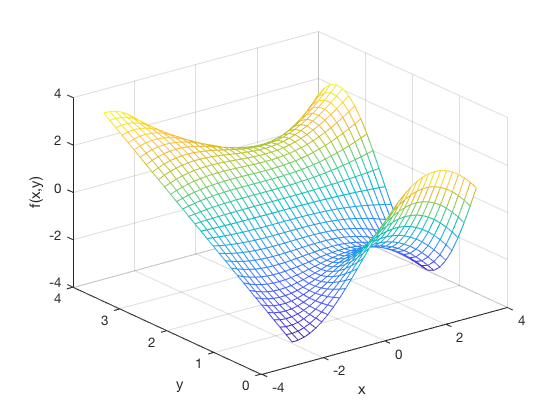

In [86]:
f_xy = x .* cos(y) + y .* sin(x);
size(f_xy)

mesh(x, y, f_xy)
xlabel('x'); ylabel('y'); zlabel('f(x,y)')

## Matris-multiplikation

# Övning 4

- Fraktaler
  - Julia-fraktalen
  - Koch-kurvan
  - Fern-fraktalen
  - 3D exempel

# Koch snöflingan

<https://en.wikipedia.org/wiki/Koch_snowflake>

är en själv-similär fraktal.

<https://en.wikipedia.org/wiki/Self-similarity>

Den kan konstrueras iterativt genom att

1. Givet en linje mellan två punkter
2. Dela upp linjen i fyra nya linjer med 1/3 av linjens längd, enl. figur nedan.
3. För varje nytt linje-segment repetera proceduren från punkt 1.

<img src="koch_steps.svg" witdh="900" height="900">

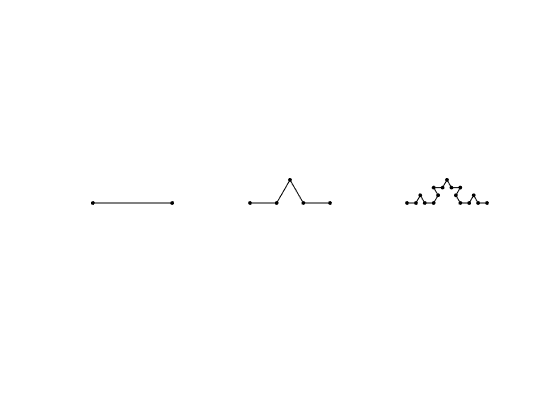

In [58]:
v = [[-1; 0], [+1; 0]];

fig = figure();
N = 3;
for i = 1:N
    subplot(1, N, i)
    plot(v(1, :), v(2, :), '.-k')
    xlim([-1.5, 1.5])
    ylim([-1.5, 1.5])
    axis('square')
    axis('off')
    v = koch(v, 1, +1);
end

print(fig, '-dsvg', 'koch_steps.svg')

In [104]:
v1 = [-1, -1/sqrt(3)]';
v2 = [+1, -1/sqrt(3)]';
v3 = [ 0, +2/sqrt(3)]';

v_tri = [v1, v2, v3, v1];

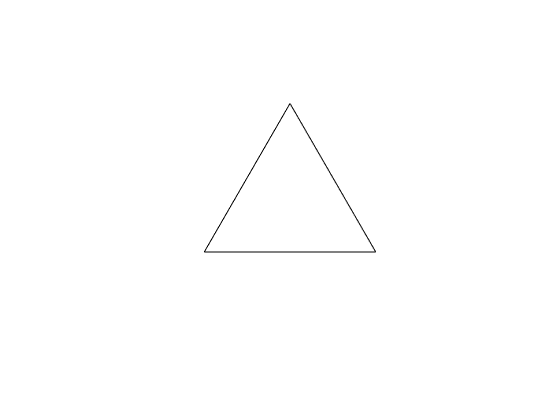

In [105]:
x = v_tri(1, :);
y = v_tri(2, :);

plot(x, y, '-k')
xlim([-2, 2])
ylim([-2, 2])
axis('square')
axis('off')

In [106]:
%%file koch.m

function v = koch(v_start, steps, dir)

v = v_start;

R = dir * [0, -1; 1, 0]; % Rotation matrix

for i = 1:steps
    vn = [[]];
    for j = 1:length(v) - 1
      
      v1 = v(:, j);
      v2 = v(:, j + 1);

      dv_para = 1/3 * (v2 - v1);
      dv_orth = sqrt(3)/2 * R * dv_para;
      
      v3 = v1 + dv_para;
      v4 = v2 - dv_para;
      v5 = v3 + dv_para/2 + dv_orth;
      
      vv = [v1, v3, v5, v4];
      vn = [vn, vv];
    end
    vn = [vn, v2];
    v = vn;
end

end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/HT2021/koch.m'.


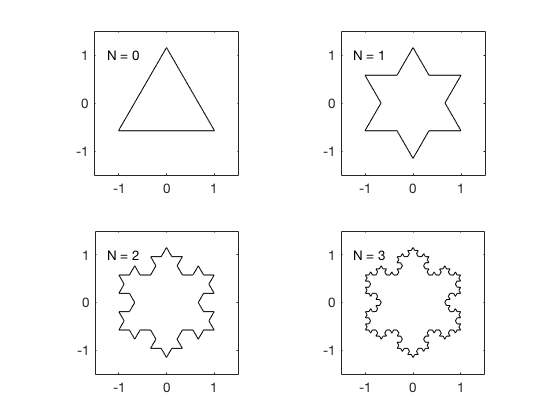

In [107]:
figure()
for N = 0:3
    v = koch(v_tri, N, -1);
    subplot(2, 2, N+1)
    plot(v(1,:), v(2, :), '-k')
    xlim([-1.5, 1.5])
    ylim([-1.5, 1.5])
    axis('square')
    text(-1.25, 1, sprintf("N = %i", N))
end

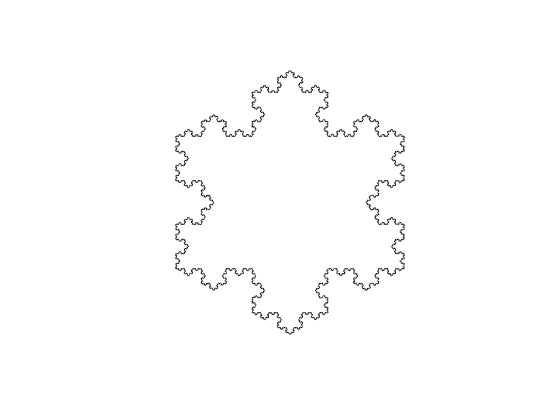

In [108]:
v_flake = koch(v_tri, 6, -1);

x = v_flake(1, :);
y = v_flake(2, :);

fig = figure();
plot(x, y, '-k')
xlim([-1.5, 1.5])
ylim([-1.5, 1.5])
axis('square')
axis('off')

print(fig, '-dsvg', 'koch.svg')

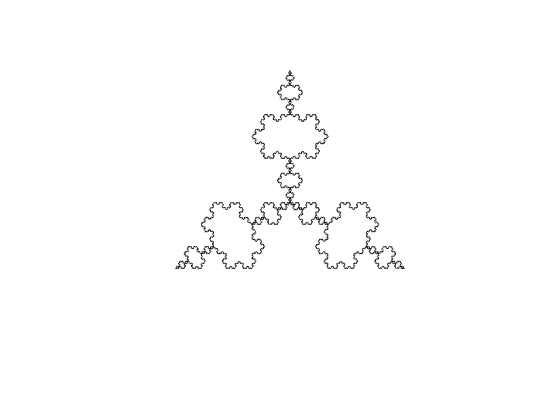

In [109]:
v_rev = koch(v_tri, 6, +1);

x = v_rev(1, :);
y = v_rev(2, :);

fig = figure();
plot(x, y, '-k')
xlim([-1.5, 1.5])
ylim([-1.5, 1.5])
axis('square')
axis('off')

print(fig, '-dsvg', 'koch_rev.svg')

## The Barnsley fern

<https://en.wikipedia.org/wiki/Barnsley_fern>

In [110]:
N = 100000;

xy = [0; 0];
fern = zeros(N, 2);

f_1 = [0 0; 0 0.16];
f_2 = [0.85 0.04; -0.04 0.85];
f_3 = [0.2 -0.26; 0.23 0.22];
f_4 = [-0.15 0.28; 0.26 0.24];

P = randsample(1:4, N, true, [0.01 0.85 0.07 0.07]);

for i = 2:N
    p = P(i - 1);
    if p == 1 % Stem
        xy = f_1 * xy;
    elseif p == 2 % Sub-leaflets
        xy = f_2 * xy + [0; 1.6];
    elseif p == 3 % Left leaflet
        xy = f_3 * xy + [0; 1.6];
    else % Right leaflet
        xy = f_4 * xy + [0; 0.44];
    end
    
    fern(i, 1) = xy(1);
    fern(i, 2) = xy(2);
end

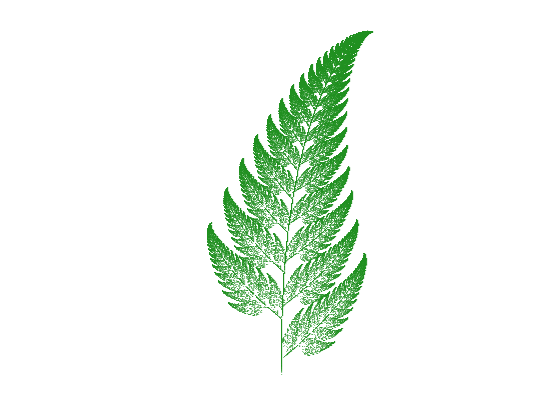

In [111]:
fig = figure();

darkgreen = [0, 0.5, 0];

colormap(summer(N));
set(gcf, 'Color', 'k', 'position', [10, 50, 800, 600]);
s = scatter(fern(:, 1), fern(:, 2), 1.0, darkgreen, 'filled');
alpha(s, 0.5)
set(gca, 'Color', 'k');
axis('image')
axis('off')

print(fig, '-dpng', 'barnsley.png', '-r600')

# Mandelbrot set

<https://en.wikipedia.org/wiki/Mandelbrot_set>

Elapsed time is 0.255535 seconds.


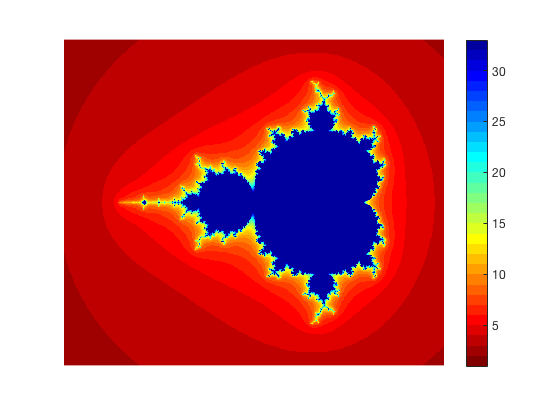

In [125]:
N = 2 * 350;
M = 2 * 300;
depth = 32;

x = linspace(-2.5, 1, N);
y = linspace(-1.5, 1.5, M);
A = zeros([N, M]);

tic
for i = 1:length(x)
for j = 1:length(y)
    z = 0.;
    z0 = x(i) + 1i * y(j);
    for iteration = 1:depth
        z = z.^2 + z0;
        if abs(z) > 4
            break
        end
    end
    A(i, j) = iteration;
end
end
toc

image(A')

axis('image'); colormap(flipud(jet(depth))); axis off;
colorbar

Elapsed time is 0.329418 seconds.


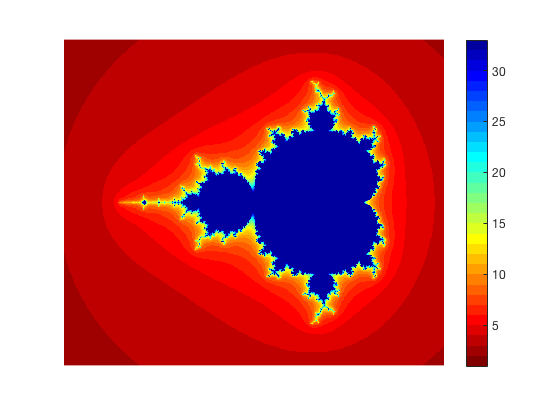

In [135]:
N = 2 * 350;
M = 2 * 300;

depth = 32;

x = linspace(-2.5, 1, N);
y = linspace(-1.5, 1.5, M);
A = zeros([N, M]);

z0 = x' + 1.j * y;
z = zeros([N, M]);

tic
for iter = 1:depth
    z = z.^2 + z0;
    A = (A == 0) .* (abs(z) > 4) * iter + A .* (A > 0);
end
A = (A == 0) * depth + A .* (A > 0);
toc

image(A')

axis('image'); colormap(flipud(jet(depth))); axis off;
colorbar

## Julia set

<https://en.wikipedia.org/wiki/Julia_set>

In [55]:
c = -0.8 + 0.156i
%c = 0.285 + 0.01i
R = 2


c =

  -0.8000 + 0.1560i


R =

     2



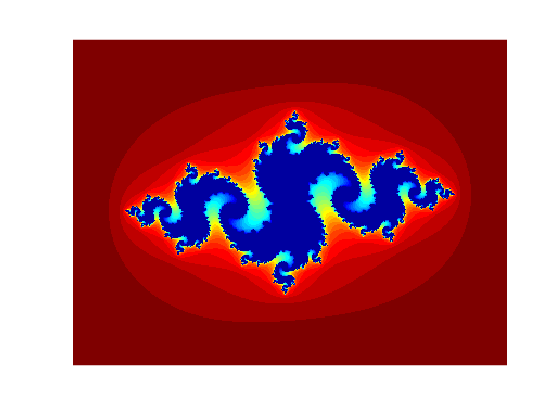

In [96]:
N = 400;
M = 300;
depth = 32;

x = linspace(-2.0, 2.0, N);
y = linspace(-1.5, 1.5, M);
A = zeros([N, M]);

for i = 1:length(x)
for j = 1:length(y)
    z = x(i) + 1i * y(j);
    for iteration = 1:depth
        z = z.^2 + c;
        if abs(z) > R
            break
        end
    end
    A(i, j) = iteration;
end
end

image(A')

axis('image'); colormap(flipud(jet(depth))); axis off;

# 3D fractal example

<https://js1k.com/2016-elemental/demo/2552>

Details
<https://gist.github.com/literallylara/064b5dd878d803d6422a96cc046ea33f>